### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [ ]:
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    ingreso_total = sum(tienda_df['Precio'])
    print(f"El ingreso total de la {nombre_tienda} es: ${ingreso_total}")

El ingreso total de la Tienda 1 es: $1150880400.0
El ingreso total de la Tienda 2 es: $1116343500.0
El ingreso total de la Tienda 3 es: $1098019600.0
El ingreso total de la Tienda 4 es: $1038375700.0


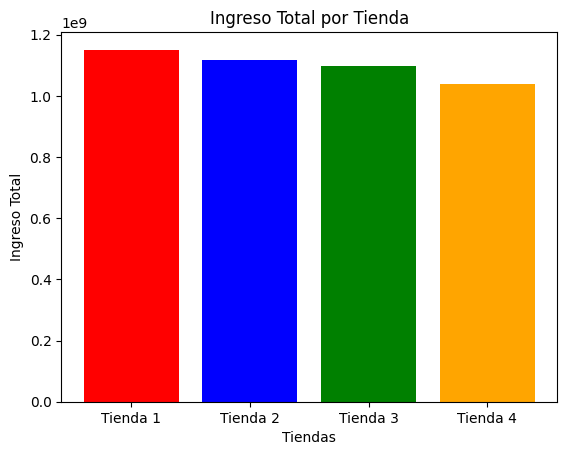

In [ ]:
import matplotlib.pyplot as plt
colores = ['red', 'blue', 'green', 'orange']
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [sum(tienda['Precio']), sum(tienda2['Precio']), sum(tienda3['Precio']), sum(tienda4['Precio'])], color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Tienda')
plt.show()

# 2. Ventas por categor√≠a

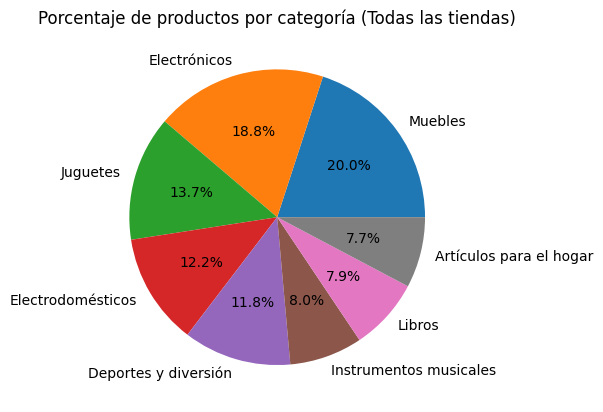

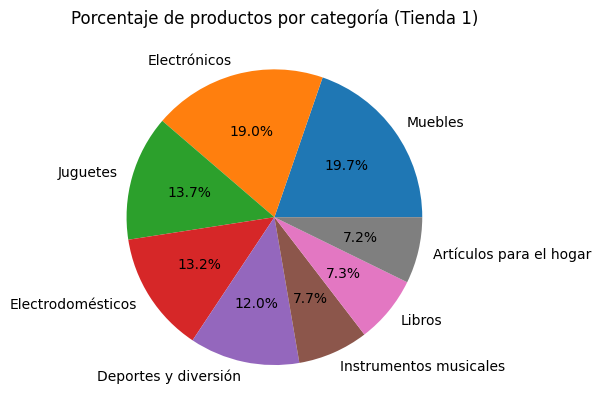

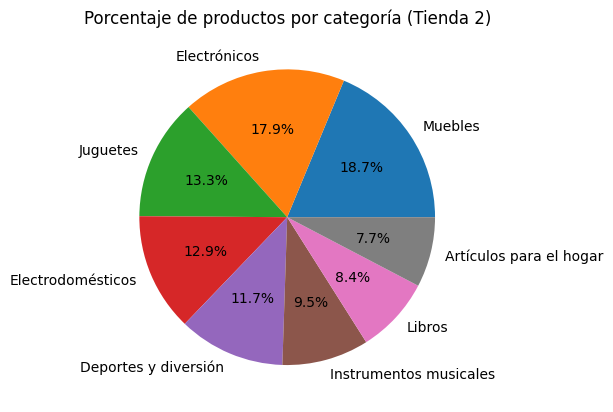

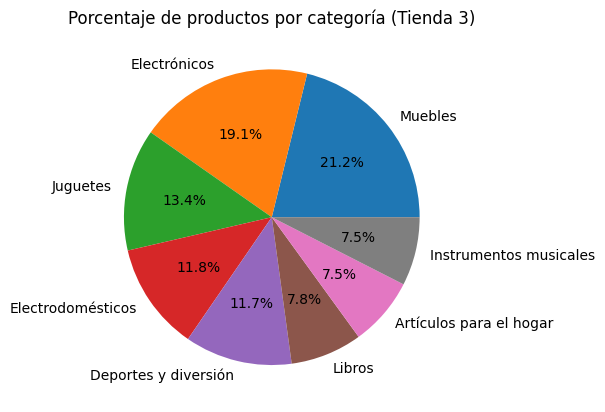

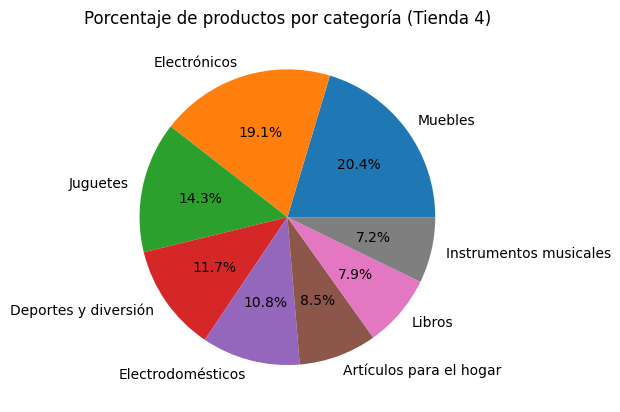

In [ ]:
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Cantidad de productos por categor√≠a en todas las tiendas
cantidad_productos_por_categoria_todas = todas_las_tiendas.groupby('Categor√≠a del Producto')['Producto'].count().sort_values(ascending=False)
plt.pie(cantidad_productos_por_categoria_todas, labels=cantidad_productos_por_categoria_todas.index, autopct='%1.1f%%')
plt.title('Porcentaje de productos por categor√≠a (Todas las tiendas)')
plt.show()

for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    cantidad_productos_por_categoria = tienda_df.groupby('Categor√≠a del Producto')['Producto'].count().sort_values(ascending=False)

    plt.pie(cantidad_productos_por_categoria, labels=cantidad_productos_por_categoria.index, autopct='%1.1f%%')
    plt.title(f'Porcentaje de productos por categor√≠a ({nombre_tienda})')
    plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
promedio_calificaciones_tiendas = []
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    promedio_calificacion = round(tienda_df['Calificaci√≥n'].mean(), 2)
    promedio_calificaciones_tiendas.append(promedio_calificacion)
    print(f"La calificaci√≥n promedio de la {nombre_tienda} es: {promedio_calificacion}/5")

La calificaci√≥n promedio de la Tienda 1 es: 3.98/5
La calificaci√≥n promedio de la Tienda 2 es: 4.04/5
La calificaci√≥n promedio de la Tienda 3 es: 4.05/5
La calificaci√≥n promedio de la Tienda 4 es: 4.0/5


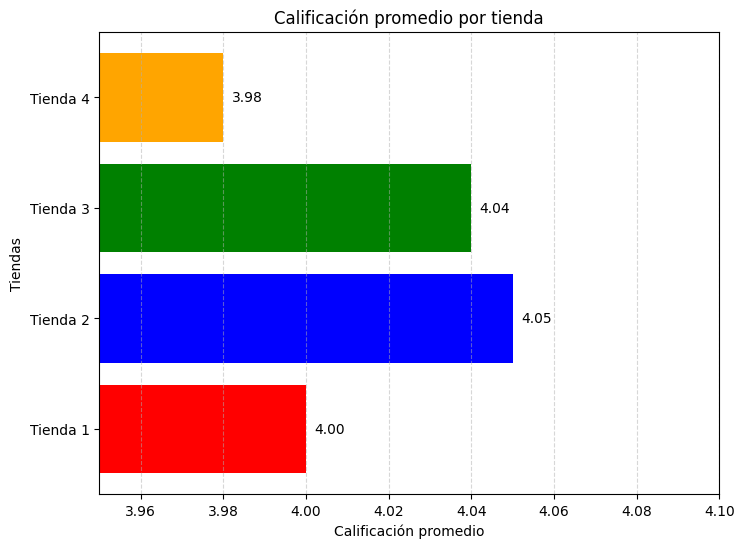

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], promedio_calificaciones_tiendas, color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Calificaci√≥n promedio')
plt.ylabel('Tiendas')
plt.title('Calificaci√≥n promedio por tienda')
plt.xlim(3.95, 4.1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
for i, v in enumerate(promedio_calificaciones_tiendas):
    plt.text(v + 0.002, i, f'{v:.2f}', va='center')
plt.show()

# 4. Productos m√°s y menos vendidos

In [ ]:
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    conteo_productos = tienda_df['Producto'].value_counts()
    if not conteo_productos.empty:
        max_ventas = conteo_productos.max()
        min_ventas = conteo_productos.min()
        productos_mas_vendidos = conteo_productos[conteo_productos == max_ventas].index.tolist()
        productos_menos_vendidos = conteo_productos[conteo_productos == min_ventas].index.tolist()
        print(f"En {nombre_tienda}:")
        print(f"üü¢ Producto(s) m√°s vendido(s) ({max_ventas} ventas): {', '.join(productos_mas_vendidos)}")
        print(f"üî¥ Producto(s) menos vendido(s) ({min_ventas} ventas): {', '.join(productos_menos_vendidos)}")
    else:
        print(f"{nombre_tienda} no tiene productos registrados.")
    print()

En Tienda 1:
üü¢ Producto(s) m√°s vendido(s) (60 ventas): Microondas, TV LED UHD 4K, Armario
üî¥ Producto(s) menos vendido(s) (33 ventas): Auriculares con micr√≥fono, Celular ABXY

En Tienda 2:
üü¢ Producto(s) m√°s vendido(s) (65 ventas): Iniciando en programaci√≥n
üî¥ Producto(s) menos vendido(s) (32 ventas): Juego de mesa

En Tienda 3:
üü¢ Producto(s) m√°s vendido(s) (57 ventas): Kit de bancas
üî¥ Producto(s) menos vendido(s) (35 ventas): Bloques de construcci√≥n

En Tienda 4:
üü¢ Producto(s) m√°s vendido(s) (62 ventas): Cama box
üî¥ Producto(s) menos vendido(s) (33 ventas): Guitarra el√©ctrica



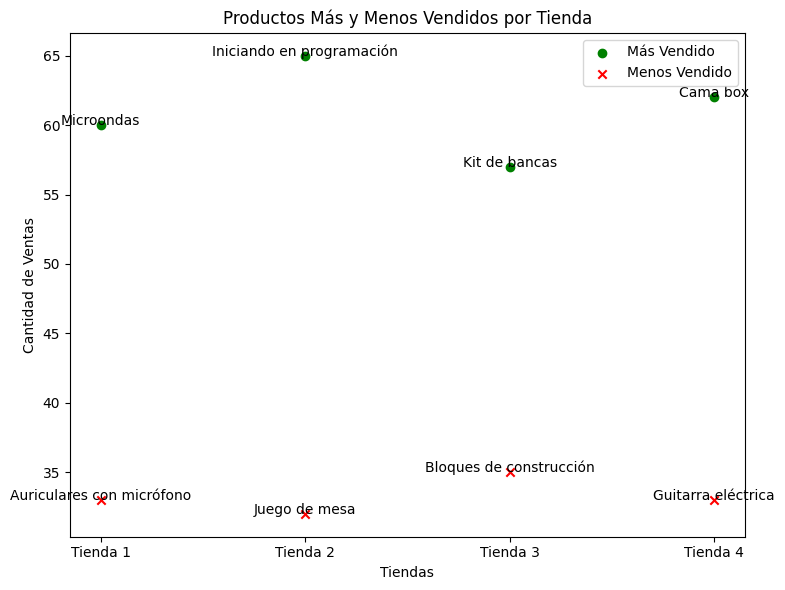

In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
productos_max = []
ventas_max = []
productos_min = []
ventas_min = []

for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    conteo_productos = tienda_df['Producto'].value_counts()
    if not conteo_productos.empty:
        max_ventas = conteo_productos.max()
        min_ventas = conteo_productos.min()
        productos_mas_vendidos = conteo_productos[conteo_productos == max_ventas].index.tolist()
        productos_menos_vendidos = conteo_productos[conteo_productos == min_ventas].index.tolist()
        productos_max.append(productos_mas_vendidos[0])
        productos_min.append(productos_menos_vendidos[0])
        ventas_max.append(max_ventas)
        ventas_min.append(min_ventas)


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(tiendas, ventas_max, color='g', label='M√°s Vendido', marker='o')
ax.scatter(tiendas, ventas_min, color='r', label='Menos Vendido', marker='x')

for i in range(len(tiendas)):
    ax.text(tiendas[i], ventas_max[i], f'{productos_max[i]}', ha='center', fontsize=10, color='black')
    ax.text(tiendas[i], ventas_min[i], f'{productos_min[i]}', ha='center', fontsize=10, color='black')

ax.set_title("Productos M√°s y Menos Vendidos por Tienda")
ax.set_xlabel("Tiendas")
ax.set_ylabel("Cantidad de Ventas")
ax.legend()
plt.tight_layout()
plt.show()

# 5. Env√≠o promedio por tienda

In [ ]:
envios_promedio = []
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    envios_por_tienda = round(tienda_df['Costo de env√≠o'].mean(), 2)
    envios_promedio.append(envios_por_tienda)
    print(f"El env√≠o promedio de la {nombre_tienda} es: ${envios_por_tienda}")

El env√≠o promedio de la Tienda 1 es: $26018.61
El env√≠o promedio de la Tienda 2 es: $25216.24
El env√≠o promedio de la Tienda 3 es: $24805.68
El env√≠o promedio de la Tienda 4 es: $23459.46


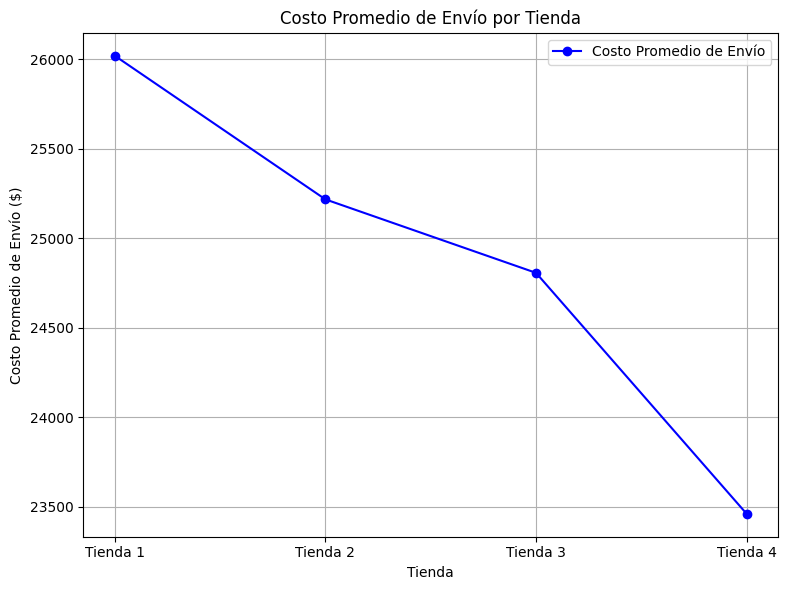

In [ ]:
tiendas = [f"Tienda {i + 1}" for i in range(4)]
plt.figure(figsize=(8, 6))
plt.plot(tiendas, envios_promedio, marker='o', linestyle='-', color='b', label='Costo Promedio de Env√≠o')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Env√≠o ($)')
plt.title('Costo Promedio de Env√≠o por Tienda')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Resoluci√≥n

El prop√≥sito de este an√°lisis es determinar cu√°l de las cuatro tiendas disponibles representa la mejor opci√≥n para que el Sr. Juan venda sus productos. Para tomar esta decisi√≥n, se consideraron m√∫ltiples factores: los ingresos totales generados, la distribuci√≥n de categor√≠as de productos, la calificaci√≥n promedio de los clientes, los productos m√°s y menos vendidos y el costo promedio de env√≠o. Esta evaluaci√≥n integral permitir√° identificar la tienda que presenta mejores condiciones comerciales, log√≠sticas y de satisfacci√≥n del cliente.

1. Ingresos Totales
*   Tienda 1: $1,150,880,400.0

*   Tienda 2: $1,116,034,500.0

*   Tienda 3: $1,098,019,600.0

*   Tienda 4: $1,038,375,700.0

   Conclusi√≥n: La Tienda 1 lidera en ingresos totales, lo que refleja un alto volumen de ventas.


2. Categor√≠as de Productos
Las categor√≠as m√°s fuertes en todas las tiendas fueron Muebles y Electr√≥nicos, superando el 19% del portafolio. Sin embargo:

*   Tienda 1: Muebles (19.7%), Electr√≥nicos (19.0%)

*   Tienda 4: Muebles (20.4%), Electr√≥nicos (19.1%) ‚Äî mayor enfoque en estas categor√≠as clave

*   Tienda 3 tambi√©n tiene un portafolio balanceado, con √©nfasis en Muebles (21.2%).

  Conclusi√≥n: Las Tiendas 3 y 4 tienen el portafolio m√°s enfocado en las categor√≠as de alto valor.

3. Calificaci√≥n Promedio de Clientes
*   Tienda 1: 4.00

*   Tienda 2: 4.05

*   Tienda 3: 4.04

*   Tienda 4: 3.98

 Conclusi√≥n: La Tienda 2 tiene la mejor percepci√≥n por parte de los clientes.

4. Productos M√°s y Menos Vendidos
*   Tienda 1 vendi√≥ muy bien productos como microondas y TV UHD, pero tambi√©n tuvo productos con muy bajas ventas.

*   Tienda 2 destac√≥ con ‚ÄúIniciando en programaci√≥n‚Äù como producto top, lo que sugiere inter√©s en tecnolog√≠a educativa.

*   Tienda 3 tuvo buena venta de mobiliario (Kit de bancas), sin productos con desempe√±o muy bajo.

*   Tienda 4 destac√≥ por la ‚ÄúCama box‚Äù, pero tuvo un bajo desempe√±o en guitarras el√©ctricas.

Conclusi√≥n: Tienda 3 presenta menos productos con bajo rendimiento, lo que indica un portafolio mejor optimizado.

5. Costo Promedio de Env√≠o
*  Tienda 4: $23,450 (m√°s bajo)

*  Tienda 1: $26,050 (m√°s alto)

 Costos decrecen progresivamente de Tienda 1 a Tienda 4.

 Conclusi√≥n: La Tienda 4 tiene una clara ventaja log√≠stica.

üö´ Tienda que se deber√≠a eliminar: Tienda 4
Es la tienda que menos ingresos genera en total, con $1,038,375,700, significativamente por debajo de las dem√°s.

Tiene la peor calificaci√≥n promedio de los clientes, con un 3.98, lo que refleja una menor satisfacci√≥n en comparaci√≥n con las otras tiendas.

Su producto menos vendido es una guitarra el√©ctrica, lo que sugiere que su audiencia no est√° bien alineada con ciertos tipos de productos, posiblemente los de alto valor.

Aunque ofrece el costo de env√≠o promedio m√°s bajo, esta ventaja log√≠stica no compensa sus debilidades en ingresos, percepci√≥n del cliente y desempe√±o de productos.

Por estas razones, Tienda 4 es la opci√≥n menos favorable y debe ser eliminada del portafolio del Sr. Juan.
